### Домашнє завдання: Пониження розмірностей для Аналізу Портретів Клієнтів

#### Контекст
В цьому ДЗ ми попрацюємо з методами пониження розмірності на наборі даних для задачі аналізу портретів клієнтів (Customer Personality Analysis). **В попередньому ДЗ ми працювали з цими даними використовуючи кластеризацію, зараз використаємо кластеризацію і візуалізауємо результати з різними методами.**

Customer Personality Analysis - це аналіз різних сегментів клієнтів компанії. Цей аналіз дозволяє бізнесу краще розуміти своїх клієнтів і полегшує процес адаптації продуктів під конкретні потреби, поведінку та інтереси різних типів клієнтів.

Аналіз портретів клієнтів допомагає бізнесу змінювати свій продукт на основі цільової аудиторії, розділеної на різні сегменти. Наприклад, замість того, щоб витрачати гроші на маркетинг нового продукту для всіх клієнтів у базі даних компанії, бізнес може проаналізувати, який сегмент клієнтів найімовірніше придбає продукт, і потім зосередити маркетингові зусилля лише на цьому сегменті.

#### Вхідні дані
Вам надано набір даних з такими атрибутами:

**Характеристики користувачів:**
- `ID`: Унікальний ідентифікатор клієнта
- `Year_Birth`: Рік народження клієнта
- `Education`: Рівень освіти клієнта
- `Marital_Status`: Сімейний стан клієнта
- `Income`: Річний дохід домогосподарства клієнта
- `Kidhome`: Кількість дітей у домогосподарстві клієнта
- `Teenhome`: Кількість підлітків у домогосподарстві клієнта
- `Dt_Customer`: Дата реєстрації клієнта у компанії
- `Recency`: Кількість днів з моменту останньої покупки клієнта
- `Complain`: 1, якщо клієнт скаржився за останні 2 роки, 0 - якщо ні

**Продукти:**
- `MntWines`: Сума, витрачена на вино за останні 2 роки
- `MntFruits`: Сума, витрачена на фрукти за останні 2 роки
- `MntMeatProducts`: Сума, витрачена на м'ясні продукти за останні 2 роки
- `MntFishProducts`: Сума, витрачена на рибні продукти за останні 2 роки
- `MntSweetProducts`: Сума, витрачена на солодощі за останні 2 роки
- `MntGoldProds`: Сума, витрачена на золото за останні 2 роки

**Акції:**
- `NumDealsPurchases`: Кількість покупок, зроблених з використанням знижок
- `AcceptedCmp1`: 1, якщо клієнт прийняв пропозицію у першій кампанії, 0 - якщо ні
- `AcceptedCmp2`: 1, якщо клієнт прийняв пропозицію у другій кампанії, 0 - якщо ні
- `AcceptedCmp3`: 1, якщо клієнт прийняв пропозицію у третій кампанії, 0 - якщо ні
- `AcceptedCmp4`: 1, якщо клієнт прийняв пропозицію у четвертій кампанії, 0 - якщо ні
- `AcceptedCmp5`: 1, якщо клієнт прийняв пропозицію у п'ятій кампанії, 0 - якщо ні
- `Response`: 1, якщо клієнт прийняв пропозицію в останній кампанії, 0 - якщо ні

**Взаємодія з компанією:**
- `NumWebPurchases`: Кількість покупок, зроблених через вебсайт компанії
- `NumCatalogPurchases`: Кількість покупок, зроблених за каталогом
- `NumStorePurchases`: Кількість покупок, зроблених безпосередньо у магазинах
- `NumWebVisitsMonth`: Кількість відвідувань вебсайту компанії за останній місяць


Для початку, запустіть код нижче. Всі ці кроки ми робили в попередньому ДЗ і для того, щоб результати кластеризації у нас були схожими, потрібно аби передобробка була однаковою.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

# 1. Завантаження даних
df = pd.read_csv("drive/MyDrive/ML_Course/Lessons_next/M_3_2_Методи пониження розмірності/Data/marketing_campaign.csv", sep="\t")

# 2. Обробка пропущених значень
df['Income_not_filled'] = df.Income.isna()
df.Income = df.Income.fillna(-1)

# 3. Обробка дати реєстрації
df.Dt_Customer = pd.to_datetime(df.Dt_Customer, format='%d-%m-%Y')
today = df.Dt_Customer.max()
df['days_lifetime'] = (today - df.Dt_Customer).dt.days
df['years_customer'] = df.Year_Birth.apply(lambda x: today.year - x)

# 4. Категоризація рівня освіти
df_education = pd.get_dummies(df.Education, prefix='education').astype(int)
df = pd.concat([df, df_education], axis=1)

# 5. Очищення сімейного стану
marital_status_map = {'Alone': 'Single', 'Absurd': 'Else', 'YOLO': 'Else'}
df['Marital_Status_clean'] = df.Marital_Status.map(marital_status_map)
df_ms = pd.get_dummies(df.Marital_Status_clean, prefix='marital').astype(int)
df = pd.concat([df, df_ms], axis=1)

# 6. Форматування доходу і видалення викиду
df.Income = df.Income.astype(int)
df = df[df.Income != 666666]

# 7. Створення фінального набору даних
X = df.drop(['ID', 'Dt_Customer', 'Education', 'Marital_Status', 'Marital_Status_clean'], axis=1)
X.reset_index(drop=True, inplace=True)

In [3]:
X.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Income_not_filled,days_lifetime,years_customer,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,marital_Else,marital_Single
0,1957,58138,0,0,58,635,88,546,172,88,...,False,663,57,0,0,1,0,0,0,0
1,1954,46344,1,1,38,11,1,6,2,1,...,False,113,60,0,0,1,0,0,0,0
2,1965,71613,0,0,26,426,49,127,111,21,...,False,312,49,0,0,1,0,0,0,0
3,1984,26646,1,0,26,11,4,20,10,3,...,False,139,30,0,0,1,0,0,0,0
4,1981,58293,1,0,94,173,43,118,46,27,...,False,161,33,0,0,0,0,1,0,0


### Завдання 1: Виконання кластеризації та пониження розмірності для візуалізації результатів

Ваше завдання — провести кластеризацію клієнтів та візуалізувати результати кластеризації, використовуючи метод головних компонент (PCA) для пониження розмірності даних.

#### Інструкції:

1. **Вибір ключових характеристик:**
   Давайте обмежимось тільки наступними хараткеристиками для кластеризації цього разу:
   - `Income`: Річний дохід домогосподарства клієнта
   - `Recency`: Кількість днів з моменту останньої покупки клієнта
   - `NumStorePurchases`: Кількість покупок, зроблених безпосередньо у магазинах
   - `NumDealsPurchases`: Кількість покупок, зроблених з використанням знижок
   - `days_lifetime`: Кількість днів з моменту реєстрації клієнта у компанії
   - `years_customer`: Вік клієнта
   - `NumWebVisitsMonth`: Кількість відвідувань вебсайту компанії за останній місяць
   Відберіть в наборі даних `X` лише ці характеристики.

2. **Стандартизація даних:**
   Використайте метод `StandardScaler` для стандартизації значень обраних характеристик.
   
   **Чому не MinMaxScaler:**
   - Для PCA краще використовувати StandardScaler, бо він вирівнює дисперсію ознак, на відміну від MinMaxScaler, що просто масштабує значення без врахування варіації.

   - Для K-Means також краще використовувати StandardScaler, бо алгоритм чутливий до масштабів: фічі з більшими значеннями сильніше впливають на обчислення відстаней, що може спотворити кластери.

3. **Кластеризація:**
   Проведіть кластеризацію клієнтів, використовуючи метод `KMeans` з трьома кластерами.

4. **Пониження розмірності:**
   Використайте метод головних компонент (PCA) для пониження розмірності даних до трьох компонент.

5. **Візуалізація результатів:**
   Використовуючи plolty express побудуйте 3D-графік розподілу клієнтів у просторі трьох головних компонент, де кольором позначено кластери.

6. **Опишіть, що спостерігаєте:**
   Чи кластеризація чітко розділила дані?

Далі ми детальніше проінтерпретуємо результати візуалізації і пониження розмірностей.

In [4]:
main_features = ['Income', 'Recency', 'NumStorePurchases', 'NumDealsPurchases', 'days_lifetime', 'years_customer', 'NumWebVisitsMonth']
x_main = X[main_features].copy()
x_main.head()

,Income,Recency,NumStorePurchases,NumDealsPurchases,days_lifetime,years_customer,NumWebVisitsMonth
0,58138,58,4,3,663,57,7
1,46344,38,2,2,113,60,5
2,71613,26,10,1,312,49,4
3,26646,26,4,2,139,30,6
4,58293,94,6,5,161,33,5


In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
# scaler = StandardScaler()
# num_cols = x_main.select_dtypes(include="number").columns
# x_scaled = scaler.fit_transform(x_main)

In [7]:
scaler = StandardScaler()
x_scaled = pd.DataFrame(
    scaler.fit_transform(x_main),
    columns=x_main.columns,
    index=x_main.index
)

In [8]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [9]:
kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(x_scaled)

labels = kmeans.predict(x_scaled)

centroids = kmeans.cluster_centers_
s = metrics.silhouette_score(x_scaled, labels, metric='euclidean')
print(f'Silhouette Coefficient for the data Dataset Clusters: {s:.2f}')

Silhouette Coefficient for the data Dataset Clusters: 0.21


In [10]:
import plotly.express as px

X_clusters = x_scaled.copy()
X_clusters['cluster'] = labels.astype(int)
X_clusters['cluster'] = X_clusters['cluster'].astype(str)

In [11]:
fig = px.scatter_3d(
    X_clusters,
    x="Income",
    y="days_lifetime",
    z="Recency",
    color="cluster",
    hover_data=['years_customer','NumStorePurchases']
)
fig.show()

In [12]:
from sklearn.decomposition import PCA

In [13]:
pca = PCA(n_components=3, random_state=0)
pca_x = pca.fit_transform(x_scaled)

In [14]:
df_pca = pd.DataFrame(pca_x, columns=['PC1', 'PC2', 'PC3'], index=x_scaled.index)
kmeans = KMeans(n_clusters=3, n_init='auto', random_state=0).fit(pca_x)
clusters = kmeans.labels_

df_pca['cluster'] = clusters

fig = px.scatter_3d(df_pca, x='PC1', y='PC2', z='PC3', color='cluster', opacity=0.8)
fig.show()

Після застосування PCA кластери розподілені доволі непогано. Бачимо, що 1 та 2 кластери (рожевий та жовтий) мають чіткий кордон, з міеімальною кількістю перетинів, що може означати, що ці два кластери мають суттєву різницю. Синій (0) кластер здебільшого класифікований також непогано, проте тут бачимо явно розмиті кордони з двома іншими кластерами.

### Завдання 2: Аналіз результатів пониження розмірності

1. **Розрахунок частки поясненої дисперсії:**
   Визначте, яка частка загальної варіації даних пояснюється кожною з трьох головних компонент (PC1, PC2, PC3) за допомогою атрибуту `explained_variance_ratio_` об'єкта PCA. Виведіть результат на екран.

2. **Розрахунок кумулятивної частки поясненої дисперсії:**
   Обчисліть кумулятивну частку поясненої дисперсії для трьох головних компонент, щоб зрозуміти, скільки варіації даних пояснюється першими кількома компонентами.

In [15]:
pca.explained_variance_ratio_

array([0.31847333, 0.19659128, 0.1433869 ])

Найбільше інформації зберіглось у PC1 компоненті, а загалом всі 3 компоненти дали нам змогу зберігти приблизно 65% інформації

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
np.cumsum(pca.explained_variance_ratio_)

array([0.31847333, 0.51506461, 0.6584515 ])

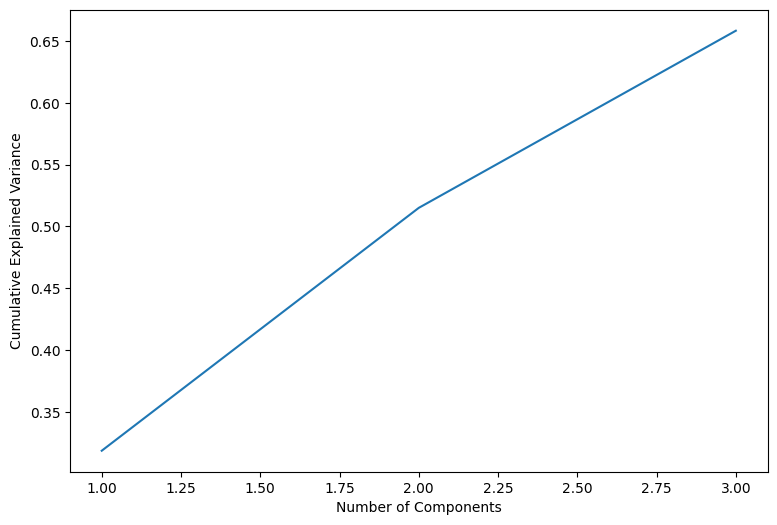

In [18]:
plt.figure(figsize=(9, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance');

### Завдання 3: Інтерпретація "Loadings"

Продовжуємо інтерпретацію результатів `PCA`і познайомимось з новим поняттям `loadings`, яке допоможе нам знайти звʼязок між головними компонентами і оригінальними ознаками в наборі даних.

Ми зараз побудували візуалізацію кластерів точок даних в просторі трьох головних компонент. Але хочеться знайти звʼязок між головними компонентами і оригінальними ознаками. Для розуміння, які початкові характеристики даних мають найбільший вплив на ці головні компоненти, ми можемо використати атрибут `components_` методу `PCA`.

#### Що таке `pca.components_`?

`pca.components_` — це масив, який містить коефіцієнти (або "ваги"), що показують внесок кожної вихідної ознаки у кожну з головних компонент. Ці коефіцієнти ще називаються **"loading"** або "навантаженнями" компонент.

- **Loadings** (`навантаження`) відображають важливість кожної змінної (ознаки) для відповідної головної компоненти. Вони показують, яким чином змінні поєднуються, щоб утворити нові, зменшені вимірювання.
- Якщо коефіцієнт має високе абсолютне значення (як позитивне, так і негативне), це вказує на те, що відповідна змінна сильно впливає на головну компоненту.

#### Саме завдання
Ваше завдання — обчислити "навантаження" для кожної з головних компонент і інтерпретувати результати.

1. **Обчислення loadings для компонент:**
   Використайте атрибут `components_` об'єкта PCA для створення DataFrame, який відображатиме внесок кожної вихідної ознаки в кожну головну компоненту.

2. **Інтерпретація результатів:**
   Виведіть значення "навантажень" і проаналізуйте, які ознаки найбільше впливають на кожну головну компоненту.

In [19]:
feat_names = getattr(x_scaled, "columns", np.arange(x_scaled.shape[1]))

loadings = pd.DataFrame(
    pca.components_.T,
    index=feat_names,
    columns=[f"PC{i+1}" for i in range(pca.n_components_)]
)

loadings

,PC1,PC2,PC3
Income,0.584238,0.165255,-0.044491
Recency,0.010075,0.036810,0.975799
NumStorePurchases,0.488621,0.384659,-0.080566
NumDealsPurchases,-0.198661,0.608119,-0.034808
days_lifetime,-0.132683,0.602585,-0.022223
years_customer,0.189393,0.208946,0.193368
NumWebVisitsMonth,-0.571728,0.216329,-0.015815


Ознаки, що найбільше впливають на кожну компоненту

In [20]:
top_features = loadings.abs().idxmax()
print(top_features)

PC1               Income
PC2    NumDealsPurchases
PC3              Recency
dtype: object


Перша головна компонента (PC1) найбільше описується ознакою Income, отже саме рівень доходу робить найбільший внесок у варіацію даних уздовж цього напрямку.  
Друга компонента (PC2) найбільше пов’язана з кількістю NumDealsPurchases, тобто відображає поведінкові аспекти, пов’язані з купівлями за знижками.  
Третя компонента (PC3) переважно визначається ознакою Recency, що вказує на значення часу від останньої покупки для пояснення різниць між клієнтами.

###Завдання 4
Давайте проаналізуємо "навантаження" (**loadings**) для трьох головних компонент після вилучення ознаки `Income`. Це допоможе нам зрозуміти, як змінилася важливість інших ознак для кожної головної компоненти, коли одна з ключових характеристик (`Income`) була вилучена.

#### Кроки для проведення аналізу і ваше завдання:

1. Видаліть ознаку `Income` з нашого набору даних `X` і повторно виконайте PCA (метод головних компонент) для отримання нових "навантажень".

2. Обчисліть нові "навантаження" для трьох головних компонент на наборі даних без `Income`

3. Проаналізуйте, які ознаки мають найбільший вплив на кожну головну компоненту після вилучення `Income`.

4. Перегляньте, наскільки кожна з головних компонент пояснює дисперсію в даних без ознаки `Income`.

In [21]:
x_short = x_scaled.drop(columns='Income', axis=1).copy()

In [22]:
pca = PCA(n_components=3, random_state=0)
pca_x = pca.fit_transform(x_short)

feat_names = getattr(x_short, "columns", np.arange(x_short.shape[1]))

loadings = pd.DataFrame(
    pca.components_.T,
    index=feat_names,
    columns=[f"PC{i+1}" for i in range(pca.n_components_)]
)

loadings

,PC1,PC2,PC3
Recency,-0.014416,0.074880,0.990219
NumStorePurchases,-0.381237,0.629202,-0.111063
NumDealsPurchases,0.445591,0.461539,-0.061793
days_lifetime,0.383782,0.467914,0.006776
years_customer,-0.177270,0.393576,0.056285
NumWebVisitsMonth,0.690787,-0.107863,0.009910


In [23]:
top_features = loadings.abs().idxmax()
print(top_features)

PC1    NumWebVisitsMonth
PC2    NumStorePurchases
PC3              Recency
dtype: object


In [24]:
pca.explained_variance_ratio_

array([0.27392228, 0.21444861, 0.16684415])

Після видалення Income:  
Найбільший внесок в PC1 дає NumWebVisitsMonth (0.691 за модулем). Ця ознака була другою за значимістю при розрахунках з Income. З цікавого, значно зросли показники для NumDealsPurchases (з 0.198 до 0.445 по модулю) і days_lifetime (з 0.132 до 0.383 по модулю). Також відзначаємо, що всі ознаки змінили знаки на протилежні.

В PC2 тепер домінує NumStorePurchases (0.629 за модулем). А days_lifetime і NumDealsPurchases на другому і третьому місці відповідно.

В PC3 майже нічого не змінилось, там як і раніше домінує Recency з трохи більшим значенням ніж при Income (0.990 по модулю).  

Видалення Income, який раніше визначав основний напрям варіації даних, призвело до перебудови головних компонент: на місце доходу вийшли поведінкові ознаки (візити на сайт, кількість покупок, тривалість взаємодії з компанією). Це означає, що після усунення впливу фінансового чинника PCA починає виділяти нові осі відмінностей між клієнтами, які більше відображають патерни поведінки, а не соціально-економічний статус. При цьому сумарна пояснена дисперсія майже не зменшилась, тобто інші змінні частково компенсують інформацію, втрачену через відсутність доходу.

### Завдання 5: Візуалізація кластеризації за допомогою t-SNE

Ваше завдання — використати метод t-SNE для візуалізації результатів кластеризації клієнтів у двовимірному просторі. Метод t-SNE допомагає знизити розмірність даних та зберегти локальні структури в даних, що робить його ефективним для візуалізації високорозмірних даних. Ми також зможемо порівняти результат цього методу з РСА.

1. Використайте метод t-SNE для зниження розмірності до 2х вимірів даних, які включають ознаки всі, що і в завданні 1, а також були відмасштабовані перед пониженням розмірностей.

2. Створіть новий DataFrame з координатами, отриманими після застосування t-SNE, та додайте до нього мітки кластерів.

3. Побудуйте інтерактивний 2D-графік розподілу клієнтів, де кольором буде позначено різні кластери і проаналізуйте графік з рекомендаціями нижче (можливо треба буде вивести додаткові візуалізації чи таблиці для інтерпретації, але треба прям зрозуміти, які ознаки формують який кластер і чим кластери відрізняються одне від одного).

  **Опишіть отримані кластери з точки зору ознак.**

4. Опишіть відмінність графіка tSNE від PCA.

#### ЯК можна інтерпретувати з t-SNE?

Хоча t-SNE не надає "компонентів" як РСА, він забезпечує низьковимірне представлення даних, яке можна візуально інтерпретувати:

- **Кластери:** t-SNE особливо добре показує кластери подібних точок. Якщо ви бачите чітко визначені кластери на графіку t-SNE, це свідчить про наявність груп схожих спостережень у ваших даних. Проаналізувати їх можемо, якщо додамо дані в `hover_data` або якщо якісь з даних виведемо як розмір чи форма точок на візуалізації. Також корисно може бути вивести середні значення ознак по кластерам.
- **Локальна структура:** Відносне розташування точок одного кластеру на графіку t-SNE може допомогти вам зрозуміти, які дані подібні між собою.
- **Глобальна структура:** Будьте обережні; t-SNE менш надійний для відображення глобальних структур (наприклад, відстаней між кластерами) у порівнянні з PCA, бо t-SNE націлений на збереження саме локальних структур.

In [25]:
from sklearn.manifold import TSNE

In [26]:
tsne = TSNE(n_components=2, random_state=0)
tsne_x = tsne.fit_transform(x_scaled)

In [27]:
df_tsne = pd.DataFrame(tsne_x, columns=["TSNE1", "TSNE2"], index=x_scaled.index)
df_tsne["cluster"] = kmeans.labels_

feat_cols = ["Income","Recency","NumStorePurchases","NumDealsPurchases",
             "days_lifetime","years_customer","NumWebVisitsMonth"]
df_tsne[[f"{c}" for c in feat_cols]] = x_scaled[feat_cols].round(2)

fig = px.scatter(
    df_tsne, x="TSNE1", y="TSNE2", color="cluster", opacity=0.85,
    hover_name=df_tsne.index.astype(str),
    hover_data=[f"{c}" for c in feat_cols]

)
fig.show()

На цьому графіку видно, що загалом кластери добре окреслені, але розділення між ними не таке чітке, як на PCA-графіку. Наприклад, у межах жовтого кластера можна побачити кілька точок, які належать до інших кластерів. Це може означати, що ці клієнти мають схожі характеристики з жовтим кластером, але все ж трохи відрізняються — тому алгоритм відніс їх до іншої групи.
На відміну від PCA, де кластери перетинаються тільки на межі, t-SNE показує більше змішаних точок усередині груп, бо він зосереджується на локальній схожості між спостереженнями, а не на глобальному поділі.

In [28]:
cluster_sizes = df_tsne["cluster"].value_counts()
profiles = x_scaled.assign(cluster=labels).groupby("cluster").mean().T


In [29]:
cluster_sizes

,count
cluster,
1,933
2,796
0,510


In [30]:
profiles

cluster,0,1,2
Income,-0.832004,0.024377,0.958037
Recency,-0.022399,0.033314,0.007737
NumStorePurchases,-0.805005,0.281216,0.784516
NumDealsPurchases,-0.265331,1.386163,-0.456525
days_lifetime,-0.202900,0.771401,-0.189551
years_customer,-0.273991,0.254206,0.179395
NumWebVisitsMonth,0.490625,0.640450,-0.926969


Проаналізувавши відхилення від середнього по кожній ознаці для кожного кластера, можна припустити, що алгоритм розподілив користувачів за наступними признаками:  
Кластер 0  
- часто купують за знижками, регулярно заходять на сайт, давно взаємодіють із компанією; мають рівень доходу трохи більший за середній; здійснюють покупки як онлайн так і офлайн.
Тобто це активні користувачі, які добре реагують на акційні пропозиції.  
Кластер 1  
- часто переглядають сайт, але купують рідко; мають життєвий цикл коротший за середній і дохід нижче середнього. Частіше купують саме онлайн.  
Кластер 2
- рідко заходять на сайт, роблять покупки в магазинах без знижок, мають високий дохід і тривалий стаж клієнта.